<h1 align="center"><font face = "Times New Roman" size = "80">JPEG Compression</font></h1>
<h2 align="center"><font face = "Times New Roman" size = ""> Information theory and coding</font></h2>
<h3 align="center"><font face = "Times New Roman"> Fall 2019</font></h3>
<h6 align="center"><font face = "Times New Roman"">Alaa Mohamed Roshdy&nbsp 201600031</font></h6>
<h6 align="center"><font face = "Times New Roman">Mohamed Adham Mahrous&nbsp 201601078</font></h6>
<h6 align="center"><font face = "Times New Roman">Mohamed Mostafa Hamed&nbsp 201600236</font></h6>
<h6 align="center"><font face = "Times New Roman">Mohamed Kasem Saber&nbsp 201601144</font></h6>


---



In [0]:
#Install lib to count FLOP operations
pip install python-papi

In [0]:
import numpy as np
from PIL import Image
import encoder as e
import main as m
from pypapi import events, papi_high as high

In [0]:
# Download desired image
!wget 'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/joker-1568899702.jpg?crop=0.514xw:0.771xh;0.168xw,0.0733xh&resize=480:*'
! mv 'joker-1568899702.jpg?crop=0.514xw:0.771xh;0.168xw,0.0733xh&resize=480:*' 'joker.jpg'

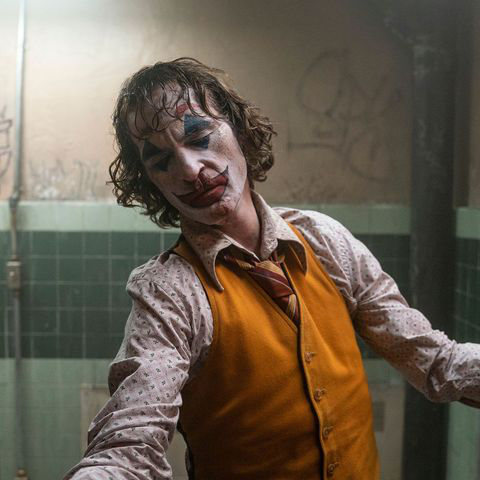

In [0]:
# Display the image
im = Image.open('joker.jpg')
im

In [0]:
def rmse(im, reconstructed_image):
  """
    Gets the RMSE of 2 images
    Args:
         im (numpy array) : The original image
         reconstructed_image (numpy ndarray): The reconstructed image
    Returns:
        rmse: root mean squared error as a metric to compare between the original image and the reconstructed
  """
  error = im - reconstructed_image
  mse = np.sum(np.square(error)) / (im.shape[0] * im.shape[1])
  rmse = np.square(mse)

  return rmse




---


<h2 align="center"><font face = "Times New Roman">JPEG compression</font></h3>


In [0]:
# Define block size
box_size_8 = 8
box_size_16 = 16

# Generate quantization table    
#q1_table = np.asarray([i * np.ones(box_size_8) for i in range(1,box_size_8+1)]).reshape(box_size_8,box_size_8)
#q2_table =
reconstructed = []
operations = []

# Apply 8 x 8 compression using q1 table
#high.start_counters([events.PAPI_FP_OPS,])
huffcoded, code_dict, n_blocks = m.encode(im, box_size_8, q1_table)
reconstructed.append( m.decode(huffcoded, code_dict, n_blocks, box_size_8, q1_table))
#operations.append( high.stop_counters() )

# Apply 8 x 8 compression using q2 table
huffcoded, code_dict, n_blocks = m.encode(im, box_size_8, q2_table)
reconstructed.append( m.decode(huffcoded, code_dict, n_blocks, box_size_8, q2_table) )


# Apply 16 x 16 compression using q1 table
#high.start_counters([events.PAPI_FP_OPS,])
huffcoded, code_dict, n_blocks = m.encode(im, box_size_16, q1_table)
reconstructed.append( m.decode(huffcoded, code_dict, n_blocks, box_size_16, q1_table))
#operations.append( high.stop_counters() )

# Apply 16 x 16 compression using q2 table
huffcoded, code_dict, n_blocks = m.encode(im, box_size_16, q2_table)
reconstructed.append( m.decode(huffcoded, code_dict, n_blocks, box_size_16, q2_table))




---


<h2 align="center"><font face = "Times New Roman">Comparison</font></h3>


In [0]:
# Amount of compression achieved

##################################################
# Number of floating point operations
#print("The number of floating point operations\n For the 8x8 block sized compression: ", operations[0],
#      "\nFor 16x16 block sized compression: ", operations[1])

##################################################
# Quality of compressed image (RMSE)
imarr = e.reshape_image(im)
rms_error =[]
# For 8 x 8 block sizes
rms_error.append(rmse(imarr, reconstructed_8_q1))
rms_error.append(rmse(imarr, reconstructed_8_q2))
# For 16 x 16 block sizes
rms_error.append(rmse(imarr, reconstructed_16_q1))
rms_error.append(rmse(imarr, reconstructed_16_q2))

# Print results
print("The quality of image compressed using RMSE\n For the 8x8 block sized compression: ",
      "\n  Using q1 table:", rms_error[0],
      "\n  Using q2 table:", rms_error[1],
      "\n For 16x16 block sized compression: ", 
      "\n  Using q1 table:",rms_error[2],
      "\n  Using q2 table:",rms_error[3])